# Artificial (classic) neural networks - theory

Neural networks are often compared to brains, simulating dense fully interconnected layers of neurons to learn how to recognize patterns. The practicality behind neural networks is that it is not taught explicitly but rather learns by itself, from given examples.

Typical standard neural network has a range from a few dozen to thousands of artificial neurons, generally called units or nodes, arranged in a series of layers. Nodes have values ranging from `0.0` to `1.0`, where `0` represents fully inactive and `1` represents fully active, with all (infinite) possible values inbetween. Each node in each layer is connected to its neighbours layer's neurons, as depicted in below's image. The lines connected from one node to another are called `weights`, determining whether the strength of the activated node should activate the connected neuron. 

The left most layer in neural networks is called the input layer. All the nodes in the input layer are the variables you wish to `feed` to the neural network. The right most layer in a neural network is called the output layer. The nodes in the output layer represent the values, the amount of output values equalling the amount of output nodes, one wishes to extract.

### Hidden layers

Layers between the input and output layer are called hidden layers, these are responsible for detecting pattersn which make neural networks purposeful. Neural networks (hidden layers) can detect patterns by activating nodes only if the weighted treshhold of multiple other nodes from a previous connected layer reached an activation treshold; this happens in hidden layers, these are all the layers inbetween the input and output layers.
![simple-nn](sources/simple-nn.png)

Observe the following hidden layer node below. The hidden layer node is connect to 3 other nodes from the previous layer. Said hidden neuron has a activation treshold, meaning that it only `activates` when the 3 other connected nodes have high enough values. 
![activation-node](sources/activation-node.png)

The algebraic mathematics behind above illustrated activation function is depicted below; where `x` equials the input nodes, `w` equals the `weights`, and `∑j` the weighted sum. For simlicity reasons the mathematically described node below only has a binary output of either 0 or 1, no possible inbetween numbers as mentioned earlier.
![activation-node-mathematics](sources/activation-math.png)

A more illustrative version of above's equation would be the following.

![nn-equation](sources/nn-math-function.j)

## Handwritten digits example
How would a computer recognize handwritten digits? One could write a computer vision (CV) algorithm which detects exact shapes, which inheritently describes the problem: exact shapes. Handwriting is pretty much unique for each person, everybody writes each digit slightly different. it's trivial to write a CV implementation trying to take into account every handwritten form of each digit. Instead we can a neural network which will do the same as a CV implementation: detecting shapes. However a neural network can learn by itself, given enough data. There is no need for an engineer to endlessly program each possible shape for each digit into an CV algorithm.

MNIST is a dataset containing 70,000 labelled images of handwritten digits.
![digits](sources/digits.png)

Remember from earlier, the input layer consists of all variables one wants to feed the neural network. In this case we want to classify an image as a digit; hence all pixels of said image become input variables which in turn is a node in the input layer. Each image in the MNIST dataset are 28 by 28 pixels, 28x28 equals 784 pixels. The input layer will have 784 nodes.

![math](sources/overview-mnist-nn.png =100x20)

![math](sources/digits-nn-overview.png)

In order to recognize patterns the neural network needs hidden layers, which will detect shapes of the handwritten digit. The amount of required hidden layers and neurons in said layer is more or less open for trial and error. Basically each neuron in a hidden layer detects a specific shape, a pattern. Adding extra hidden layers would result in the detection of larger shapes, for example the vertical curved line or o-shape in the digit 9. Typical shapes are illustrated below as example.
![low-level-shapes](sources/low-shapes-patterns.png)

## Creating a neural network to classify handwritten digits - practical

When reading in the data, the images are labeled using one-hot-encoding which uses a vector of binary values to represent numeric or categorical values. Requiring only 10 labels for the digits 0-9, one for each digit, as any higher number is just a combination of digits. E.g. the digit 3 is represented using the vector `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`. As the value at index 3 is stored as 1, the vector therefore represents the digit 3.

## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

print("Imported all libraries!")

Imported all libraries!


## Loading dataset

In [13]:
print("Loading MNIST dataset")
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print("Done!")

Loading MNIST dataset
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Done!


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


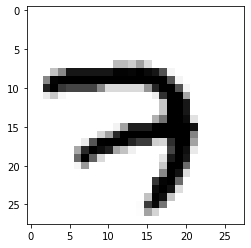

In [18]:
image = mnist.train.images[0]
reshaped = image.reshape((28, 28))
label = mnist.train.labels[0]

print(label)
plt.imshow(reshaped)

Above we can see the one-hot-encoding mentioned earlier. The vector 7th index is marked as 1, so the image should be a 7 and as the image indicates, that seems about right.

The 28x28 image is flattened into a 1D vector that is 28x28=784 pixels in size. Each of the image's 784 pixels is stored as a value from 0 to 255. It specifies the pixel's grayscale, because the images are shown only in black and white. So 255 is a black pixel and 0 is a white pixel with the various shades of gray inbetween.

![digit-matrix](sources/digit-matrix.png)

Tensorflow placeholders are to feed the actual training examples

In [17]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

Tensorflow variables and nn activation functions are trainable variables such as weights biases for the model.

In [5]:
W1 = tf.Variable(tf.zeros([784, 100]))
b1 = tf.Variable(tf.zeros([100]))
h1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.zeros([100, 10]))
b2 = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(h1, W2) + b2)

## Measuring model accuracy

Generally machine learning models accuracy is measured in Mean Squared Error (MSE). However, for Neural Networks, it's generally more accurate to use `Cross-Entropy Error` (CSE) to measure accuracy. Suppose a neural network is classifying data and the outcome is a score from 0-1 how sure it is of each possible output label. To measure accuracy we consider  3 seperate inputs for the NN to predict; 2 were predicted correctly, and 1 was wrong. MSE will measure this as a 1/3 classification error, 2/3 correct which results in an 0.67 accuracy score. Whereas `Cross-Entropy error` (CSE) calculates how correct or wrong a given prediction is. E.g a prediction that was just barely right will receive a lower score in CSE than in MSE, same case when a prediction was only just incorrect, MSE sees it as entirely wrong whereas CSE still gives points for being almost right.

In [6]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [9]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [10]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.1135


An utter terrible accuracy score of 0.11, considering that infinitely flipping a coin has an accuracy score of 0.5 for each side. this model is worse that a coin flip (not considering a coin has 2 possible outcomes and this model has 10).

This is because 1 layer cannot detect enough patterns, or at least not on a high enough level. Adding more layers should fix this problem.

## Attempt #2 multiple hidden layers

In [11]:
W1 = tf.Variable(tf.truncated_normal(shape=[784, 400], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[400]))
h1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal(shape=[400, 100], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[100]))
h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)

W3 = tf.Variable(tf.truncated_normal(shape=[100, 10], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[10]))
y = tf.nn.softmax(tf.matmul(h2, W3) + b3)

Set accuracy measurement, batches and  train the model

In [12]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9689


# Conclusion


A rounded accuracy score of 0.97, that's an amazing improvement from the original 0.11 accuracy score. And the only thing that was changed was adding another hidden layer. Tt will be difficult to get much more out of this without spending too much effort.

Drawback of this current solution is that it  doesnt say how correct it think its classification is. Take for example if we were to feed an alphabetic letter, it would classify the letter to the digit it most resembles. By adding a certainty score we can also ignore certain outcomes that are not certain enough, to root out false classifications.

# Sources

[1] Yal, O. G. (2019, September 5). Image Classification in 10 Minutes with MNIST Dataset. Retrieved October 14, 2019, from https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d.

[2] Nielsen, & A., M. (unknown date). Neural Networks and Deep Learning. Retrieved September 13, 2019, from http://neuralnetworksanddeeplearning.com/chap1.html.

[3] How neural networks work - A simple introduction. (2019, April 4). Retrieved September 13, 2019, from https://www.explainthatstuff.com/introduction-to-neural-networks.html.

[4] Ojaswy. (n.d.). Ojaswy/Neural-Networks-Recognizing-hand-written-digits. Retrieved September 12, 2019, from https://github.com/Ojaswy/Neural-Networks-Recognizing-hand-written-digits.